# Queueing theory - M/M/1 example

### 1. Imports

In [19]:
import openqtsim

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2. Prepare inputs

In [13]:
# Basic input
Lambda = 8
Mu = 9

#### Define the queue object input

In [14]:
# Create Arrival and Service processes and specify the number of servers
A = openqtsim.ArrivalProcess("M", arr_rate=Lambda)
S = openqtsim.ServiceProcess("M", srv_rate=Mu)
c = 1

#### Create the queue object and use it to create a simulating object

In [15]:
# Create the queue object and use it to create a simulating object
q = openqtsim.Queue(A, S, c)
q.kendall_notation

'M/M/1/inf/inf/FIFO'

### 3. Run the simulation

In [16]:
%%time
print('Start simulation of "{}" queue'.format(q.kendall_notation))
print('')

sim = openqtsim.Simulation(q)
sim.run(100000) 

Start simulation of "M/M/1/inf/inf/FIFO" queue

Wall time: 13.8 s


In [17]:
sim.get_stats()
print('Input IAT: {:.4f}'.format(1/Lambda))
print('Input ST: {:.4f}'.format(1/Mu))

# check at: https://www.supositorio.com/rcalc/rcalclite.htm

Waiting time over service time: 7.3243

Rho: server utilisation: 0.8836
P_0: probability nobody in the system: 0.1164

L_s: average nr of customers in the system: 7.886980282549294
L_q: average nr of customers in the queue: 6.94558263604341
W_s: the long term average time spent in the system: 0.9245
W_q: the long term average time spent in the queue: 0.8134

IAT: average inter arrival time: 0.1257
ST: average service time: 0.1111

Input IAT: 0.1250
Input ST: 0.1111


**Analytical solution: M_M_1_inf_inf_FIFO**

    arrival rate: 8.0000 per hour
    service rate: 9.0000 per hour
    rho: 0.8889

    P_0: probability that there are 0 customers in the system = 0.1111
    P_1: probability of 1 customers in the system = 0.0988
    P_10: probability of 10 customers in the system = 0.0342

    no_q: probability that there is nobody in the queue (P_0+P_1) = 0.2099
    util_sys: system utilisation rate  (P_(n>=1)) = 0.8889
    util_ser: server utilisation rate (P_(n>=2)) = 0.7901

    L_s: the long term average number of customers present in the system = 8.0000
    L_q: the long term average number of customers present in the queue = 7.1111
    W_s: the long term average time spent in the system = 1.0000 hour (= 60.0 minutes)
    W_q: the long term average waiting time in the queue = 0.8889 hour (= 53.3 minutes)

In [21]:
df, df_sys = sim.return_log()

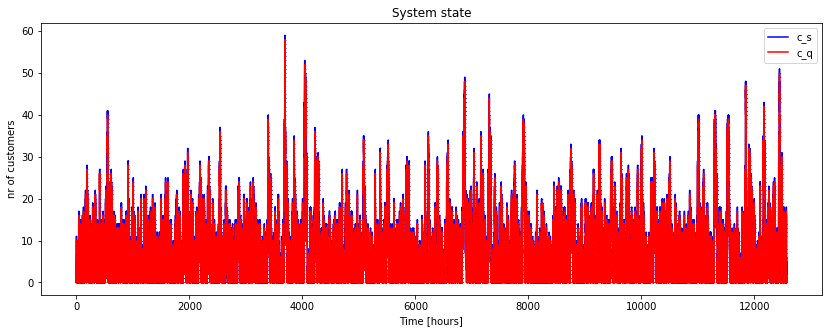

In [23]:
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(df_sys['t'].values, df_sys['c_s'].values, '-bo', markersize=.1, label='c_s') 
ax.plot(df_sys['t'].values, df_sys['c_q'].values, '-ro', markersize=.1, label='c_q')

ax.set_xlabel('Time [hours]')
ax.set_ylabel('nr of customers')
ax.set_title('System state')
ax.legend(loc='upper right')

## Sandbox

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
df_sys = pd.DataFrame(columns=['t', 'c_s', 'c_q'])
df_sys['t'] = sim.t
df_sys['c_s'] = sim.t_c_s
df_sys['c_q'] = sim.t_c_q
df_sys = df_sys.sort_values(by=['t'], ascending=[True])

In [34]:
print('L_s: average nr of customers in the system: {}'.format(np.mean(df_sys['c_s'])))
print('L_q: average nr of customers in the queue: {}'.format(np.mean(df_sys['c_q'])))

L_s: average nr of customers in the system: 7.120496987575311
L_q: average nr of customers in the queue: 6.178470538236544


In [40]:
df_sys

,t,c_s,c_q
0,0.000000,0,0
1,0.022426,1,0
2,0.022426,1,1
3,0.022426,1,0
4,0.149283,0,0
5,0.224699,1,0
6,0.224699,1,1
7,0.224699,1,0
9,0.382992,2,1
8,0.382992,2,0
